## Introduction - Considerations (Questions)

Given the CSV as provided for the Titanic Data the questions that would be considered in terms of possibility of giving a more favoriable survivabily would be:

1) Did the individual statistics of a passenger effect their possibility of survival?

      Factors:
       - Age 
       - Child or Adult
       - Gender
       
2) What deck and Class were the passengers on the titanic (1st Class, 2nd Class, 3rd Class) and did it effect their survivability?
       
       Factors:
        - Class (Section of the Titanic)
        - Cabin which passenger resides
        
3) Where did the passengers come from (disembark location), what class or section did most of the passengers for each disembark location relate to?

       Factors:
        - Disembark Location
        - Cabin which passenger resides
        - Class (section of the Titanic)
        
4) Was the passenger with or without family? and did it effect their survivalbility?
       
       Factors:
        - With siblings?
        - with Parents?

## Import for required packages and data for calculations

In [2]:
# Imports for pandas, and numpy

import numpy as np
import pandas as pd

# imports for seaborn to and matplotlib to allow graphing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

# import Titanic CSV  -  NOTE: adjust file path as neccessary
dTitanic_DF = pd.read_csv('titanic_data.csv')

# Clearing columns not neccessary for statistical analysis
dTitanic_DF = dTitanic_DF.drop(["Name", "Ticket"], axis=1)

ImportError: No module named seaborn

##### Data Modification (Dropped Columns - "Name" and "Ticket"):
<a id="Data Modification (Dropped Columns - Name and Ticket)"></a>

Columns "Name" and "Ticket" were dropped early on in the dataset as the data of the name of the passenger or the ticket number or barcode will not have a bearing in calculation of survival for the passengers.

Names can be considered if investigating individual passengers personal history but doesn't really help in determining a trend of survival probability.

Ticket information while can give a reference to a specific passenger it doesn't give much more information about the passenger besides linking the passenger to the Titanic.

## Passenger Distribution

### Summary of Passengers
<a id="Summary of Passengers"></a>

Given the data we see on each column of the dataset we see not all columns have complete information about the passengers and will need to calculate accordingly to make sure that non-data (NaN) is not calculated in the final results.

Columns to note:
    - Cabin only having 204 entries out of 891
    - Age only having 714 entries out of 891
    - Embarked only having 889 entries out of 891

In [2]:
#quick overview of the data in the dataset (by no means are completely accurate but it does give us a basic idea of the data)
dTitanic_DF.info()
dTitanic_DF.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 76.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Gender distribution of Passengers
<a id="Gender distribution of Passengers"></a>

Gender distribution of the Passengers is considered a significant factor to consider due to the tradtional belief that in times of maritime emergencies that deal with the sinking of a ship women and children were considered priority to be put on life boats to be brought to safety.  So the expectation would be that males would be the majority of the deaths on the titanic.

So the first factor to be considered is to consider how many females and males were on the titanic.

In [3]:
# Pull from data male and female designated passengers

menData = dTitanic_DF[dTitanic_DF.Sex == 'male']
womenData = dTitanic_DF[dTitanic_DF.Sex == 'female']

##### Data Organization: Organizing Titanic DataFrame to individual sex (Gender) DataFrames
<a id="Data Organization: Organizing Titanic DataFrame to individual sex (Gender) DataFrames"></a>

Pulling data from Titanic Dataset we are able to isolate males into their specific dataframe and females into their specific dataframe.

Separating the genders allows us to investigate deeper males and females individually and allow us to pull from those gender specific dataframes ages that would consider them a child or if they survived the sinking of the Titanic.

#### Gender Distribution
<a id="Gender Distribution"></a>

Males: 
577

Females: 
314


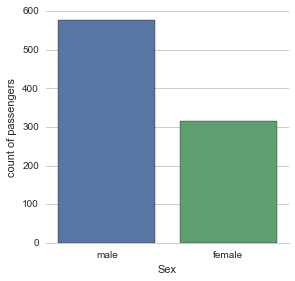

In [4]:
# Print out counts for male and female
print("Males: ")
print(menData.count()['Sex'])

print("")

print("Females: ")
print(womenData.count()['Sex'])

# Graph Population of males and females in Titanic

gSSC = sns.factorplot('Sex', data=dTitanic_DF, kind='count')
gSSC.despine(left=True)
gSSC.set_ylabels("count of passengers")

Looking at the population of each gender we see that there are a larger majority of males onboard than females.

#### Gender Distribution by Class
<a id="Gender Distribution by Class"></a>

Going deeper we should consider the gender distribution in each of the Pclass which are a classification of socioeconomic distinctions of passengers in the titanic to see if there is a significant gender population in any of the 3 socialeconomic classes.

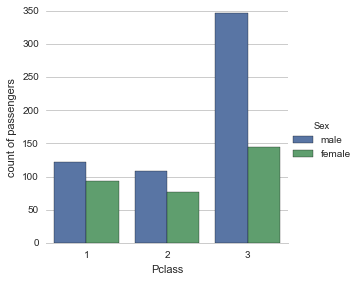

In [5]:
gGCSC= sns.factorplot('Pclass',order=[1,2,3], data=dTitanic_DF, hue='Sex', kind='count')

gGCSC.despine(left=True)
gGCSC.set_ylabels("count of passengers")

Seeing the data we see that the majority of males onboard are on the 3rd Pclass, while females are majorly distributed relatively equally among the 3 Pclasses.

### Age Distribution of Passengers

Alongside the factor of gender we also must investigate the factor of age as children would be considered for priority for lifeboats when evacuating a sinking ship.  First however we need to see how the ages factored into the the distribution of the passengers in the titanic.

In [6]:
# Youngest Passenger
print("Youngest Passenger: ")
youngestPassenger = dTitanic_DF['Age'].min()
print(youngestPassenger)

print("")

# Oldest Passenger
print("Oldest Passenger: ")
oldestPassenger = dTitanic_DF['Age'].max()
print(oldestPassenger)

print("")

# Average age of Passenger:
print("Average Age of Passengers: ")
avgPassenger = dTitanic_DF['Age'].mean()
print(avgPassenger)

Youngest Passenger: 
0.42

Oldest Passenger: 
80.0

Average Age of Passengers: 
29.6991176471


#### Distribution of age in passengers
<a id="Distribution of age in passengers"></a>

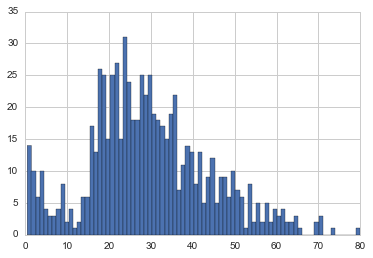

In [7]:
dTitanic_DF['Age'].hist(bins=80)

According to the data that was plotted out into a histogram we see that around ages of 20 to 35 is where the majority of passengers seemed to be at, and that is further supported as we calculated the mean and found out that the average age of passengers are about 29.69 years of age.

#### Age Distribution by Class
<a id="Age Distribution by Class"></a>

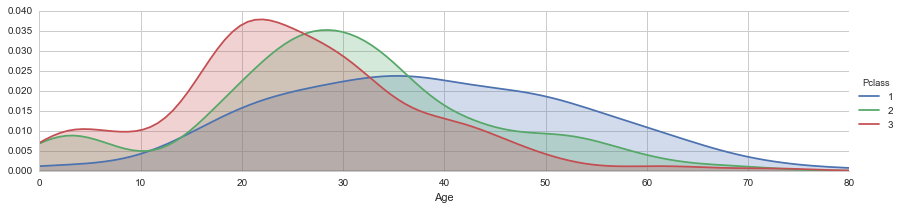

In [8]:
gCPS = sns.FacetGrid(dTitanic_DF,hue='Pclass', aspect=4, hue_order=[1,2,3])
gCPS.map(sns.kdeplot,'Age', shade=True)

gCPS.set(xlim=(0,oldestPassenger))
gCPS.add_legend()

Going a step further using a KDE (Kernel Density Estimation) graph, we can split the age data into Pclasses and see that at least class 3 and 2 had the majority of their distrobution around 15 to 40 (Pclass 3 - 10 to 35, Pclass 2 - 15 to 40 years).  Pclass 1 being the highest socioeconomically has a more diverse spread for ages that cover 10 to 70 years, this is possibly because the least amount of passengers are Pclass 1 so its possible passengers that was either very young or very old can effect the curve more than Pclass 3 which has the majority of passengers.

#### Distribution of passengers into Adults and Child (Child < 21 years of age)
<a id="Distribution of passengers into Adults and Child (Child < 21 years of age)"></a>

Source: http://history.stackexchange.com/questions/17481/what-was-the-age-of-majority-in-1900-united-states



>By the common law the age of majority is fixed at twenty-one years for both sexes, and, in the absence of any statute to the contrary, every person under that age, whether male or female, is an infant. (21)

    -- The American and English Encyclopedia of Law, Garland and McGeehee, 1900
    


>By the common law, every person is, technically, an infant, until he is twenty-one years old; and, in legal presumption, is not of sufficient discretion to contract an obligation at an earlier age.

    -- Institutes of the Lawes of England by Coke (1628-1644). The laws on infants are at 171b.    
    


To get a more detailed age distribution for the passengers of the titanic we need to determine how many passengers were considered children and which passengers were considered adults as ultimately women and children had priority to lifeboats and would be expected to have a higher rate of survival due to that fact.

Using the laws that were used at the time of the sinking of the titanic it was determined any passenger below the age of 21 would be considered an "infant" or a child.

In [9]:
# splits passengers into 3 categories (male of female if considered adult, and child if below 21 of age)

def minorOrAdult(passenger):
    age, sex = passenger
    
    if age < 21:
        return 'child'
    else:
        return sex

# adds new column to dataframe that distinguishes a passenger as a child or an adult

dTitanic_DF['PersonStatus'] = dTitanic_DF[['Age', 'Sex']].apply(minorOrAdult, axis=1)

##### Data Manipulation: Adding PersonStatus Column using function minorOrAdult
<a id="Data Manipulation: Adding PersonStatus Column using function minorOrAdult"></a>

To determine a child versus an adult a function was created called "minorOrAdult" this function takes in a data frame in which case will be our titanic dataset and pull the age and sex of the passengers in this dataset and return the sex of the passenger if the age of this passenger is over 21. If passenger isn't over 21 years of age it will return 'child'

To avoid overwriting the initial dataset a new column was added to the initial dataset (dTitanic_DF) called "PersonStatus" this column will put in what the function outputs, which could be 'male' or 'female' if age of passenger is over or equal 21 years of age or 'child' if age is under 21 years of age (gender is disregarded).

Making the function to separate passengers into two categories adult and child as well as have the adult divided into male and female allows us to see the passengers in a way that allows us to be able to isolate passenger age groups that are expected to be more likely to survive due to the "women and children first" priority on lifeboats.

In [10]:
# value_counts() used to give a population count of each of the gender groups if above 21 years of age and if passenger is a
# child or an adult

dTitanic_DF['PersonStatus'].value_counts()

male      474
female    237
child     180
Name: PersonStatus, dtype: int64

Using the value counts function we are able to see at a glance that the count of males is still fairly significant compared to female and children however now we see that males and females that are children are considered in their own group so we can pick the groups that have a potiential higher survival rate very easily (women and children priority for lifeboats).

#### Child/Adult (Male or Female) Passenger Distribution

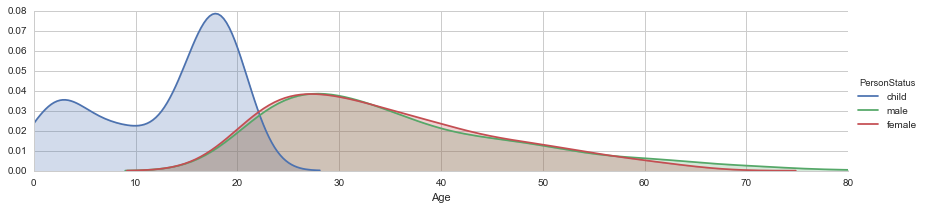

In [11]:
gACPS = sns.FacetGrid(dTitanic_DF, hue='PersonStatus', aspect=4, hue_order=['child', 'male', 'female'])
gACPS.map(sns.kdeplot,'Age', shade=True)

gACPS.set(xlim=(0,oldestPassenger))
gACPS.add_legend()

Again using an KDE graph to see in more detail child , male and female groups according to their age we can see that predominantly adult males and females remain uniformally equal in age range.  When comparing adult and child though we see that there are two major curves in child age ranges one is from newborn to about 10 years of age while the other more significant age range for children is about 10 to 21 years of age.

#### Child/Adult (Male or Female) Passenger Distribution by Class

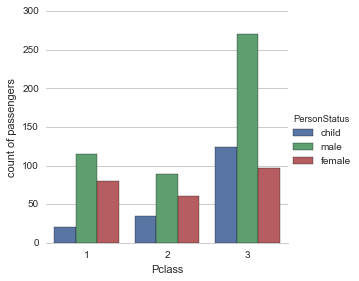

In [12]:
gGAC= sns.factorplot('Pclass', order=[1,2,3], data=dTitanic_DF, hue='PersonStatus', kind='count',hue_order=['child','male','female'])

gGAC.despine(left=True)
gGAC.set_ylabels("count of passengers")

Now that we have our distinct age groups of adult (male or female) and children (age of less than 21) we can split these age groups at the social economical level of Pclasses.  Looking at the age group in Pclasses its at first not surprising that the majority of the population for all three groups are on the poorest Pclass (Pclass 3).  Likewise its not at all suprising that adult males are the majority in every Pclass, that being said however females are fairly well equally distributed among the 3 Pclasses and children were predominantly in the 3rd Pclass.

### Passenger Distribution by Location (Cabin)
<a id="Passenger Distribution by Location (Cabin)"></a>

In [13]:
# Dropping nan entries in cabins from calculation

deckLOC = dTitanic_DF['Cabin'].dropna()


##### Data Organization: dropna() used in Cabin column data and saved to deckLOC
<a id="Data Organization: dropna() used in Cabin column data and saved to deckLOC"></a>

Keeping in mind only 204 out of the 891 in the dataset is actual value data in the Cabin column we must take out the NaN entries to make sure it doesn't effect our calculations when calculating counts for cabins in use.

To make sure there isn't any issue with non-valued data used dropna in Cabin column of the original titanic dataset and copied to deckLOC Dataframe to make sure the original dataset isn't modified.



In [14]:
# Populate deckLevels with Cabin Levels (Indicated by Letter) of passengers

deckLevels = []

for level in deckLOC:
    deckLevels.append(level[0])

TitanicCab_DF = pd.DataFrame(deckLevels)

TitanicCab_DF.columns = ['Cabin']

##### Data Organization: loaded deckLevels (Series) with the first letter of DeckLOC Cabin Column entries then create TitanicCab_DF with a Cabin Column off that Series
<a id="Data Organization: loaded deckLevels (Series) with the first letter of DeckLOC Cabin Column entries then create TitanicCab_DF with a Cabin Column off that Series"></a>

After creating deckLOC which will take in the original titanic data with rows of NaN in Cabin column omitted via dropna() we will create a numpy series which will take in specifically the first letter of the cabin entries by iterating with a for loop through each entry of the deckLOC dataframe and taking the first letter of each entry using level[0].

Once the series has the letter of the cabin for each of the passengers it will be given to column 'Cabin' in dataframe "TitanicCab_DF" to avoid modifying any data from titanic original dataset or the newly created deckLOC dataframe.

This will allow us to use Dataframe methods along with the modified Cabin column (showing only the first letter of the cabin for each passenger) in a dataframe that doesn't directly effect the original Titanic Dataset.



#### Passenger Distribution of Cabin Levels
<a id="Passenger Distribution of Cabin Levels"></a>

Another important point to consider for passengers was where they resided on the Titanic which can be separated by a variety of Decks and Cabins which was separated by letter A through G.  Keeping in mind only 204 of the original data set of 891 passengers actually have a cabin record associated with them we do have to take any figures we find about where some of the passengers cabins located with a grain of salt when comparing the relation of the cabin to survivalbility, however for now knowing a partial distribution of cabins passengers used helps at least give us an idea if the location of the cabin had any influence on the population surviving.

![DeckDiagram](http://cdn3.scmp.com/sites/default/files/styles/980w/public/2014/11/06/titanic.jpg?itok=YtRdD_Kf)
Source: http://www.scmp.com/infographics/article/1633333/infographic-titanic

Looking at the diagram of the Titanic we see A,B,C,D,E accounted for special, 1st and 2nd class passengers and the remaining F and G accounted for passengers of lower classes.

In [15]:
# Remove T from cabin as T isn't a real cabin Level
TitanicCab_DF = TitanicCab_DF[TitanicCab_DF.Cabin != 'T']

##### Data Cleanup: Removing  T entry in Column 'Cabin' of TitanicCab_DF Dataframe
<a id="Data Cleanup: Removing  T entry in Column 'Cabin' of TitanicCab_DF Dataframe"></a>

Refering to the diagram that was found by the **South China Morning Post** documenting the decks and cabins of the Titanic we see that a T deck simply didn't exist. When looking more the into the T-Cabin found out thanks to the website Encyclopedia-Titanica (Source: http://www.encyclopedia-titanica.org/cabins.html) that it was a single first class cabin that was held by a passenger named Blackwell, Mr Stephen Weart.

Since T only accounts for a single Cabin it was removed from the dataframe (TitanicCab_DF) so in the graphing it wouldn't create a new category and misrepresent the graph making it look like 'T' was its own area of cabins.


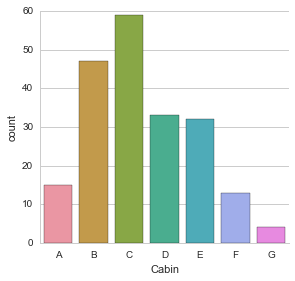

In [16]:
sns.factorplot('Cabin', order=['A','B','C','D','E','F','G'], data=TitanicCab_DF, kind='count')

Looking at the distribution of 204 of the passengers on the dataset of the Titanic we see that the majority were situated at the Cabins on Deck B and C (Millionares and first class cabins),  Moderately in cabins located in D and E (1st and 2nd class cabins) and a smaller amount in A,F, and G (A being officers quarters, F and G being lower class cabins)

### Passenger Distribution of Disembark Locations
<a id="Passenger Distribution of Disembark Locations"></a>

Disembark Cities is an interesting statistic that was in the dataset as it gives us more insight on the towns that were port to the Titanic as well as the passengers and gives us a good indication of the socioeconomical ties of the passengers.

#### Disembark Cities distribution compared to Class

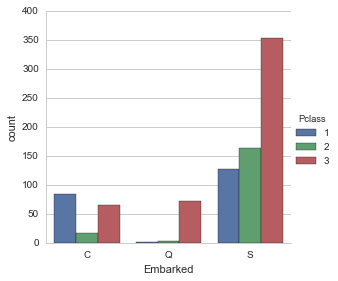

In [17]:
sns.factorplot('Embarked', order=['C','Q','S'], data=dTitanic_DF, hue='Pclass', kind='count', hue_order=[1,2,3])

Looking at the graph we see C, Q, S corresponds to Cherbourg, Queenstown, Southampton. What can be observed from the graph is that the majority of passengers comes from southhampton.  Investigating more into southhampton we see the majority of southhampton that boarded the Titanic are Pclass 3 and a more equal split between Pclass 1 and 2.  In terms of Queenstown it was predomantly Pclass 3,  while Cherbourg has a pretty close split between Pclass 1 and 3. 

### Passenger Distribution (Alone versus Family)
<a id="Passenger Distribution (Alone versus Family)"></a>

A final point to consider is the idea if the passengers traveled alone versus with family as this gives us a greater insight of passengers were in close contact with each other or predominantly were alone which could lead to more mentality of your on your own or a collaborative effort during the time of the disaster.

In [18]:
# using SibSP - Siblings on board, and using Parch - Parent or children on board
# can determine if the passenger went alone or relatives/parents/children

dTitanic_DF['Solo or Family'] = dTitanic_DF.SibSp + dTitanic_DF.Parch
dTitanic_DF['Solo or Family'].loc[dTitanic_DF['Solo or Family'] > 0] = 'Family'
dTitanic_DF['Solo or Family'].loc[dTitanic_DF['Solo or Family'] == 0] = 'Alone'

C:\Users\sdpenaloza\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


##### Data Organization/Modification: Creation of 'Solo or Family' Column in the Titanic Dataset
<a id="Data Organization/Modification: Creation of 'Solo or Family' Column in the Titanic Dataset"></a>

the original Titanic dataset provided us with 2 columns that are important when considering if a passenger traveled alone or with family, those two columns are SibSP (Siblings on board) and Parch (Parent or Children on board) to make this data easier to pull when needed (passenger alone versus with family) decided to create a new column in the original Titanic dataset that explicitly mentioned if the passenger traveled alone or with family.

Passengers were determined if they travel alone if when adding the value of SibSP and Parch in the passenger row equaled 0 and 'Alone' would be added to the column 'Solo or Family' in that passenger row, any number above 0 would mean that the passenger traveled with a family member and 'Family' would be added to the column 'Solo or Family' in that passenger row.

#### Passenger Distribution - Alone versus with family

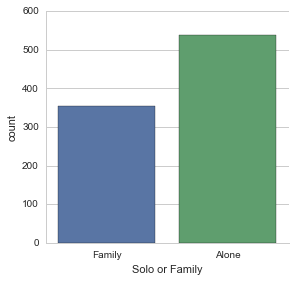

In [19]:
sns.factorplot('Solo or Family', data=dTitanic_DF, kind='count')

Looking at this graph we see that after creating a new column to use SibSP and Parch columns to determine if the passenger boarded the Titanic alone that there is a larger count of passengers that boarded alone than with family.

## Survival Calculations for Passengers - Age, Gender, Pclass, Travel alone or With Family

After all the calculations are done with distriution of the passengers in the dataset we can start organizing the distributions into possibility of survivalbility.  As mentioned a bit in some sections of the passengeer distribution sections above in this section we will go into calculating the groups and their survivalbility rates for each focusing on expected higher survival rate groups.

### Distribution of Passengers that survived versus passengers that didn't survive
<a id="Distribution of Passengers that survived versus passengers that didn't survive"></a>

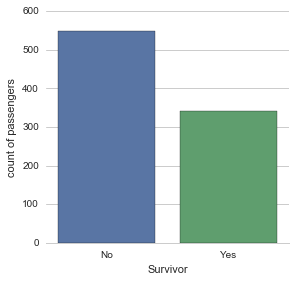

In [20]:
# Survivors Overall
dTitanic_DF['Survivor']= dTitanic_DF.Survived.map({0:'No', 1:'Yes'})

gSOA = sns.factorplot('Survivor', data=dTitanic_DF, kind='count')

gSOA.despine(left=True)
gSOA.set_ylabels("count of passengers")

When taking in the column 'survived' we can see that a larger population of passengers didn't survive versus passengers that did survive. 

##### Data Manipulation/Organization : Creation of Survivor column in Titanic dataset
<a id="Data Manipulation/Organization : Creation of Survivor column in Titanic dataset"></a>

To get a general count of survivors versus people who didn't I created a column in  the original Titanic dataset called 'Survivor'. Using the map function and having that function looking at the existing 'Survived' column if a 0 exists in the 'survived' column of the passenger row it will input a 'No' into the 'Survivor' column of the passenger row,  likewise if a 1 exists in the 'survived' column of the passenger row a 'Yes' will be inputted into the 'Survivor' column of the passenger row.

This data manipulation and addition of column may look redundant however this allows the graph to be created with the needed labels of no and yes as well as a good personal practice of use of the map function.

### Probability of Survival by Gender
<a id="Probability of Survival by Gender"></a>

Men Survivalbility: 
0.188908145581
Women Survivalbility: 
0.742038216561


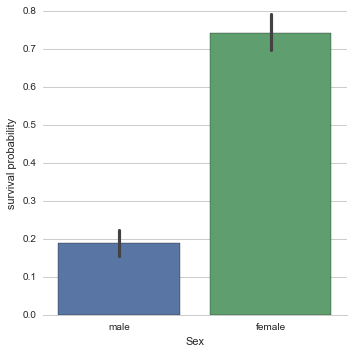

In [21]:
# Series probability - access probability of survived in men and women
menProb = menData.groupby('Sex').Survived.mean()
womenProb = womenData.groupby('Sex').Survived.mean()

menPercent = menProb[0]*100
womenPercent = womenProb[0]*100

print("Men Survivalbility: ")
print(menProb[0])

print("Women Survivalbility: ")
print(womenProb[0])


gSSP = sns.factorplot("Sex", "Survived", data=dTitanic_DF, kind="bar", size=5)

gSSP.despine(left=True)
gSSP.set_ylabels("survival probability")

Comparing the survivability of the genders we see a significant survivalbility difference, about 74% of female passengers survived while male passengers only about 19% survived.

##### Data Organization: using groupby function to quickly calculate gender probability
<a id="Data Organization: using groupby function to quickly calculate gender probability"></a>

When calculatiing the probability we use the groupby function and grouping by 'Sex' in each of the gender specfic gender dataframes we created in <a href="#Gender distribution of Passengers">"Gender distribution of Passengers"</a> (menData and womenData) to calculate the probability of survival of man and women on the Titanic.

### Probability of Survival by Class

Class 1 Survivality: 
0.62962962963
Class 2 Survivality: 
0.472826086957
Class 3 Survivality: 
0.242362525458


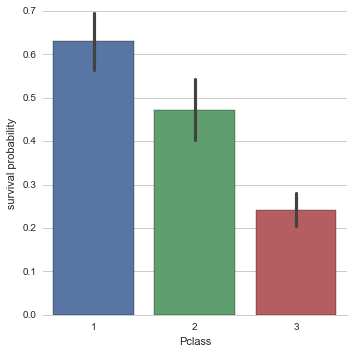

In [22]:
# Determines the probability of survival for a given Pclass

def define_pClassProb(dataFrameIN, numClass):
    classEntries = dataFrameIN[dataFrameIN.Pclass == numClass]
    sClassEntries = classEntries[classEntries.Survived == 1]

    cClassEntries = (classEntries.count(numeric_only=True)['Pclass']).astype(float)
    cSClassEntries = (sClassEntries.count(numeric_only=True)['Pclass']).astype(float)

    return (cSClassEntries/cClassEntries)
    

print("Class 1 Survivality: ")
print(define_pClassProb(dTitanic_DF, 1))

print("Class 2 Survivality: ")
print(define_pClassProb(dTitanic_DF, 2))

print("Class 3 Survivality: ")
print(define_pClassProb(dTitanic_DF, 3))


gCS = sns.factorplot("Pclass", "Survived",order=[1,2,3],data=dTitanic_DF, kind="bar", size=5)

gCS.despine(left=True)
gCS.set_ylabels("survival probability")

Looking purely at the socioeconomical survivalbility of the titanic passengers we see that Pclass 1 has the highest survivalbility at 63%, while Pclass 2 is at 47% and Pclass 3 having the lowest survivalbility at 24%.

Class 1 Survivality: 
0.62962962963
Class 2 Survivality: 
0.472826086957
Class 3 Survivality: 
0.242362525458


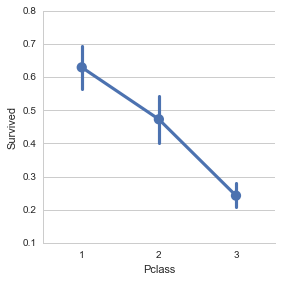

In [23]:
print("Class 1 Survivality: ")
print(define_pClassProb(dTitanic_DF, 1))

print("Class 2 Survivality: ")
print(define_pClassProb(dTitanic_DF, 2))

print("Class 3 Survivality: ")
print(define_pClassProb(dTitanic_DF, 3))

sns.factorplot("Pclass", "Survived",order=[1,2,3], data=dTitanic_DF, kind='point')

Using a point graph with line connecting the points we are able to see more clearly the survival rate for each class and how the lower the social economical class the lower the chance of survival given the passenger data from the Titanic dataset.

##### Data Organization/Manipulation: Function define_pClassProb  (function to determine probability of survival for a specified pClass)
<a id="Data Organization/Manipulation: Function define_pClassProb  (function to determine probability of survival for a specified pClass)"></a>

the function create temporary dataframes called classEntries and sClassEntries.  classEntries serve to pull from the original Titanic dataframe passengers of a specified pClass.  sClassEntries serve to pull from the original Titanic dataframe passengers of a specifed pClass and survived the sinking of the titanic (used 'Survived' column in original Titanic dataframe and look for 1 indicating survival).

After the two temporary dataframes were created used the count function to count the total passenger count in a pClass and the total passenger count of survivors in that pClass in which case converted each counts to float to avoid integer division errors in calculation to determine the final probability of the survivors of a specified pClass by dividing number of survivors of the specified pclass with the total number of passengers of that pclass.


### Probability of Survival by Class and Gender
<a id='genderSurvivalProb'></a>

Now seeing both the gender and socioeconomical classes effecting the survivalbility we want to go into more detail about the genders in each socioeconomical class.

Class 1 Survivality(MALE): 
0.368852459016
Class 1 Survivality(FEMALE): 
0.968085106383
Class 2 Survivality(MALE): 
0.157407407407
Class 2 Survivality(FEMALE): 
0.921052631579
Class 3 Survivality(MALE): 
0.135446685879
Class 3 Survivality(FEMALE): 
0.5


C:\Users\sdpenaloza\Anaconda2\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


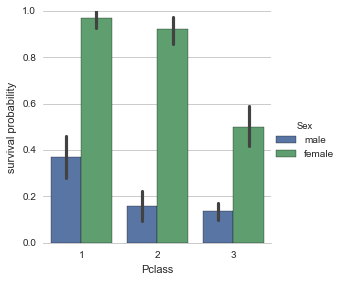

In [24]:
# determines the probability of survival for genders in a given Pclass

def define_pClassProbSex(dataFrameIN, numClass, sex):
    classEntries = dataFrameIN[dataFrameIN.Pclass == numClass][dTitanic_DF.Sex == sex]
    sClassEntries = classEntries[classEntries.Survived == 1]

    cClassEntries = (classEntries.count(numeric_only=True)['Pclass']).astype(float)
    cSClassEntries = (sClassEntries.count(numeric_only=True)['Pclass']).astype(float)

    return (cSClassEntries/cClassEntries)
    

print("Class 1 Survivality(MALE): ")
print(define_pClassProbSex(dTitanic_DF, 1, 'male'))

print("Class 1 Survivality(FEMALE): ")
print(define_pClassProbSex(dTitanic_DF, 1, 'female'))


print("Class 2 Survivality(MALE): ")
print(define_pClassProbSex(dTitanic_DF, 2, 'male'))

print("Class 2 Survivality(FEMALE): ")
print(define_pClassProbSex(dTitanic_DF, 2, 'female'))

print("Class 3 Survivality(MALE): ")
print(define_pClassProbSex(dTitanic_DF, 3, 'male'))

print("Class 3 Survivality(FEMALE): ")
print(define_pClassProbSex(dTitanic_DF, 3, 'female'))


gGCSP = sns.factorplot("Pclass", "Survived",order=[1,2,3],data=dTitanic_DF,hue='Sex', kind='bar')

gGCSP.despine(left=True)
gGCSP.set_ylabels("survival probability")

looking at gender groups within each Pclass (socioecnomical classes) we see right away that Pclass 1 (or the richest social economical class) had a near 100% survival rate for females and a about a 37% percent survival rate for males in the same Pclass( Pclass 1).  Females survived quite significantly in Pclass 2 as well at about 92% survival rate males were less than half of Pclass 1 males at about 16%.  As it comes to not that much suprise females and males in Pclass 3 (poorest class) had the lowest survival rate, females about 50% and males at 13% surivival rate. 

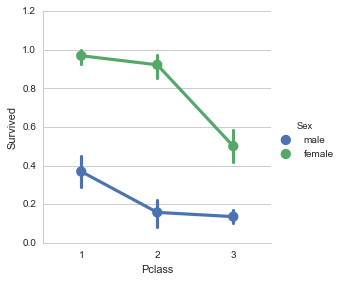

In [25]:
sns.factorplot("Pclass", "Survived", hue='Sex',order=[1,2,3], data=dTitanic_DF, kind='point')

Using a point graph with a line connecting the points we see more clearly the genders survival rate differences between socioeconomical classes.  In terms of female Pclass 1 and 2 are fairly consistent with each other however there is a drastic drop in survival probability when comparing the 2 higher classes to Pclass 3 (the poorest socioeconomical class).  In terms of male first class was more significant in terms of survival compared to Pclass 2 and 3 however as expected males have a drastically lower survival rate due to life boat priority to women and children. What was unexpected however in the males is that 1st Pclass (richest) socioeconomical class had a surivival rate close to female Pclass 3.

##### Data Organization/Manipulation: Function define_pClassProbSex  (function to determine probability of survival for a specified sex in a specified pClass)
<a id="Data Organization/Manipulation: Function define_pClassProbSex  (function to determine probability of survival for a specified sex in a specified pClass)"></a>

Similar to the function define_pClassProb in the section above, this function serves a similar purpose of calculating a probability.  However this function takes in a specified pClass, and gender.  Similarly this function will create 2 temporary dataframes called classEntries and sClassEntries. classEntries will take in from the original Titanic dataset all passengers of a specified Pclass (1,2,3) and specified gender(male or female).  sClassEntries will take in from the original Titanic dataset all passengers of a specified Pclass (1,2,3) and specified gender (male or female), in addition, only passengers that have survived ('survived' column indicates 1).

Then the function will use count function on the classEntries dataframe and sClassEntries dataframe to divide passengers that survived in a specified pClass and gender by the total passengers of that specified pClass and gender to determine the probaility.

### Probability of Survival by Class and Person Status (Gender if above 21 or child) <a id='Probability of Survival by Class and Person Status (Gender if above 21 or child)'></a>

Seeing gender have a significant difference depending on the socioeconomic class I was interested in splitting the gender and age groups (leading to groups: male, female and child (any gender below 21 years)). 

PClass 1 Survival Child: 
0.809523809524
PClass 2 Survival Child: 
0.742857142857
PClass 3 Survival Child: 
0.314516129032


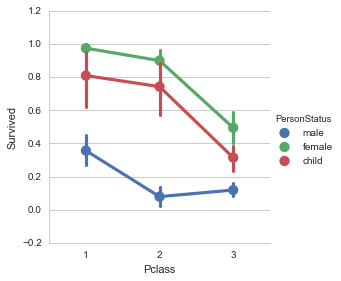

In [26]:
#Determine probability of survival of children in a given Pclass

def define_pClassChildProb(dataFrameIN, numClass):
    
    ChildDF = dataFrameIN[dataFrameIN.Pclass == numClass][dataFrameIN.PersonStatus == 'child']
    ChildSurvived = dataFrameIN[dataFrameIN.Pclass == numClass][dataFrameIN.PersonStatus == 'child'][dataFrameIN.Survivor == 'Yes']
    
    totalCChild = ChildDF.count()['PassengerId'].astype(float)
    CChildSurvived = ChildSurvived.count()['PassengerId'].astype(float)
    

    return CChildSurvived/totalCChild
    
print("PClass 1 Survival Child: ")    
print(define_pClassChildProb(dTitanic_DF, 1))

print("PClass 2 Survival Child: ")    
print(define_pClassChildProb(dTitanic_DF, 2))

print("PClass 3 Survival Child: ")    
print(define_pClassChildProb(dTitanic_DF, 3))


sns.factorplot("Pclass", "Survived", hue='PersonStatus',order=[1,2,3], data=dTitanic_DF, kind='point')

Since gender shows a significant survival probability among the different socioecnomical classes (Pclasses) wanted to go deeper and check out the survival rate of children in comparison of each Pclass and the adult genders.

We see that children falls closely to adult females which is to be expected as the women and childen priority for lifeboats as compared to every man for themselves after lifeboats are filled with females and children for male adults.

##### Data Organization/Manipulation: Function define_pClassChildProb  (function to determine probability of survival of a child (age less than 21 years) in a given pClass)
<a id="Data Organization/Manipulation: Function define_pClassChildProb  (function to determine probability of survival of a child (age less than 21 years) in a given pClass)"></a>

Similar to function define_pClassProb a few sections back we are now focusing on getting information in 'PersonStatus' column of the original Titanic Dataset that was created in <a href="#Distribution of passengers into Adults and Child (Child < 21 years of age)">"Distribution of passengers into Adults and Child (Child < 21 years of age)"</a>. 

First in this function we only need to specify the pclass in which we want the child survivalbility of.  In the function it will create 2 temporary data frames called ChildDF and ChildSurvived.  In ChildDF it will be populated with passengers that are of the pClass selected and have a 'Child' entry in the 'PersonStatus' column of the passenger row of the original Titanic Dataset.  In ChildSurvived it will be populated with passengers that are of the pClass selected, have a 'Child' entry in the 'PersonStatus' column of the Titanic Dataset as well as 'Yes' in the 'Survivor' column of the original Titanic Dataset which was created in <a href="#Distribution of Passengers that survived versus passengers that didn't survive">"Distribution of Passengers that survived versus passengers that didn't survive"</a>.

With both these data frames (ChildDF and ChildSurvived) we can use count to get the total amount of passengers that are children in a specified pClass and children in a specified pClass that survived allowing us to divide the total children in a pClass by total children in pClass that survived to generate a survival probability.

### Age Distribution by Survival
<a id='Age Distribution by Survival'></a>

 [<matplotlib.text.Text at 0xdbcd2e8>, <matplotlib.text.Text at 0xdf1f7f0>],

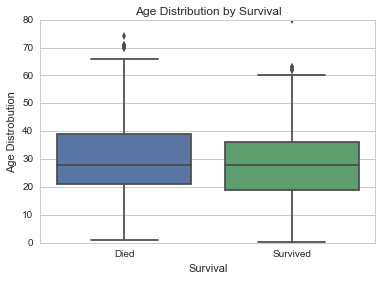

In [27]:
#sns.lmplot('Age', 'Survived', data=dTitanic_DF)
pSBA = sns.boxplot(data=dTitanic_DF, x='Survived', y='Age')
pSBA.set(title='Age Distribution by Survival',
            xlabel = 'Survival',
            ylabel = 'Age Distrobution',
            xticklabels = ['Died', 'Survived'])

Using a boxplot we see a bit better the IQR age range of the survived versus the died, showing that the mean is virtually the same between the dead and the survived age groups but showing a bit more pull towards the older ages in the IQR from the died group.

### Age by class and survival
<a id='Age by class and survival'></a>

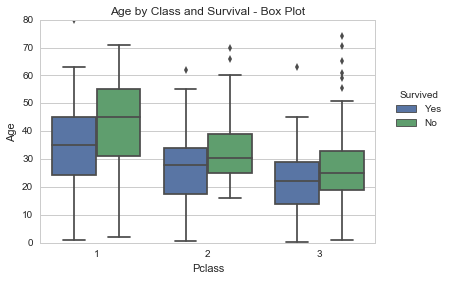

In [28]:
#sns.lmplot('Age', 'Survived',hue='Pclass', data=dTitanic_DF, hue_order=[1,2,3])
pACSB = sns.boxplot(data = dTitanic_DF.dropna(subset = ['Age']).sort_values('Pclass'), x='Pclass', y='Age', hue='Survivor')
pACSB.set(title='Age by Class and Survival - Box Plot', xlabel='Pclass')
pACSB.legend(bbox_to_anchor=(1.05, .7), loc=2, title = 'Survived',borderaxespad=0.)


Looking at each pClass we can see that survival in the pClass groups favor the younger side showing the over all inner-quartle ranges of the boxplots favored younger than their non-survival counter parts which the non-surivor IQR favored older aged passengers on every pClass.

##### Data Organization: dropna(subset=['Age']).sort_values('Pclass') for graphing Age by class and survival
<a id="Data Organization: dropna(subset=['Age']).sort_values('Pclass') for graphing Age by class and survival"></a>

Used dropna function before inputting data into box plot graph to remove any non-value entries since we determined earlier in section <a href="#Summary of Passengers">"Summary of Passengers"</a> that there was only 714 out of the 891 total passengers that had a age value in the 'age' column of the titanic dataset. Using sort_values allows us to have the data organized into the 3 pClasses before graphing the points so it is uniformly plotted each pClass at a time.  Finally used 'Survivor' column for the hue that was created in <a href="#Distribution of Passengers that survived versus passengers that didn't survive">"Distribution of Passengers that survived versus passengers that didn't survive"</a> to give a comparison group of died and survived passengers for each of the pClasses.

### Age by Gender and Survival
<a id="Age by Gender and Survival"></a>

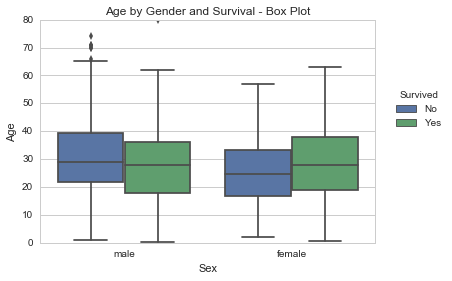

In [29]:
#sns.lmplot('Age', 'Survived', hue='Sex' ,data=dTitanic_DF)
pAGSB = sns.boxplot(data=dTitanic_DF.dropna(subset = ['Age']), x= 'Sex', y= 'Age', hue='Survivor')
pAGSB.set(title='Age by Gender and Survival - Box Plot')
pAGSB.legend(bbox_to_anchor=(1.05, .7), loc=2, title = 'Survived',borderaxespad=0.)

When looking at this graph we see comparing between the genders that on the males side older of age males accounted for a little more of the non-survivors in the male group than younger males.  Females on the other hand had the opposite effect showing that females of an older age actually accounted for a little more of the females that survived and younger females accounted more for the non-survivors in the female gender group.

##### Data Organization: dropna(subset=['Age'])for graphing Age by Gender and Survival
<a id="Data Organization: dropna(subset=['Age'])for graphing Age by Gender and Survival"></a>

Used dropna function before inputting data into box plot graph to remove any non-value entries since we determined earlier in section <a href="#Summary of Passengers">"Summary of Passengers"</a> that there was only 714 out of the 891 total passengers that had a age value in the 'age' column of the titanic dataset. In addition used 'Survivor' column for the hue that was created in <a href="#Distribution of Passengers that survived versus passengers that didn't survive">"Distribution of Passengers that survived versus passengers that didn't survive"</a> to give a comparison group of died and survived passengers for each of the genders (male and female).

### Probability of Survival Based on Traveling Alone versus with Family
<a id="Probability of Survival Based on Traveling Alone versus with Family"></a>

Probability of Survival being with Family: 
0.505649717514

Probability of Survival being alone: 
0.303538175047


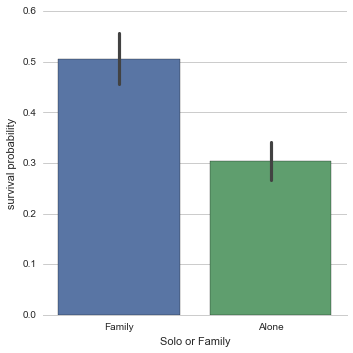

In [30]:
# Using Solo or family column created earlier in passenger distributions section created a separate dataframes for traveling 
#alone and with family passengers


familyPass = dTitanic_DF[dTitanic_DF['Solo or Family'] == "Family"]
alonePass = dTitanic_DF[dTitanic_DF['Solo or Family'] == "Alone"]

# Creates a list of surviving family and alone passengers

AFamilyPass = familyPass[familyPass.Survivor == "Yes"]
AAlonePass = alonePass[alonePass.Survivor == "Yes"]

# Determines the probability of survival for passengers that traveled alone and with family

pAF = float(AFamilyPass['Solo or Family'].count()) / float(familyPass['Solo or Family'].count())
pAA = float(AAlonePass['Solo or Family'].count()) / float(alonePass['Solo or Family'].count())

print("Probability of Survival being with Family: ")
print(pAF)

print("")

print("Probability of Survival being alone: ")
print(pAA)

gSSP = sns.factorplot("Solo or Family", "Survived", data=dTitanic_DF, kind="bar", size=5)

gSSP.despine(left=True)
gSSP.set_ylabels("survival probability")


We see in this graph that Family passengers had a 50% chance of survival compared to passengers that traveled alone which only have a 30% survival rate.

##### Data Organization:  Creation of data frames familyPass and alonePass (individual data frames for passengers who traveled with family and passengers who traveled alone).
<a id="Data Organization:  Creation of data frames familyPass and alonePass (individual data frames for passengers who traveled with family and passengers who traveled alone)"></a>

Data frames familyPass and alonePass are created to take in passengers from the original Titanic dataset on the basis if the passenger traveled alone or with family.  familyPass checks the column 'Solo Or Family' (created from: <a href="#Passenger Distribution (Alone versus Family)"> "Passenger Distribution (Alone versus Family)"</a> )from the original Titanic dataset to see if the the entry says 'Family' if it does it will be written to the familyPass data frame.  alonePass checks the column 'Solo or Family' from the original Titanic dataset to see if the entry says 'Alone' if it does it will be written to the alonePass data frame.  Ulitimately in the end familyPass should have all passengers that traveled with family  and alonePass should have all passengers that traveled alone.

Now that familyPass and alonePass has the passengers that relate to it, 2 more data frames are created AfamilyPass and AAlonePass and these data frames will pull from their perspective dataframes alive passengers (AfamilyPass will use familyPass to find survivors in familyPass data frame and copy to AfamilyPass,  AAlonePass will use alonePass to find survivors in alonePass data frame and copy to AAlonePass).

After having the total count for family passengers and count of survivors of family passengers we can determine the survival probability of passengers that traveled with family, likewise this can be done with passengers that travel alone.

## Conclusion:

When looking at the passengers data we see that we can split it into specific groups based on age (Child and adult age groups), gender, disembark cities, location of cabins and socioeconomical classes.  When separating the passengers into these groups it allows us to investigate survival statistics for each of the groups and a combination of the groups that passengers match with.

### Data Cleaning - References to data wrangling sections

- <a href="#Data Modification (Dropped Columns - Name and Ticket)">Data Modification (Dropped Columns - "Name" and "Ticket")</a>
- <a href="#Data Organization: Organizing Titanic DataFrame to individual sex (Gender) DataFrames">Data Organization: Organizing Titanic DataFrame to individual sex (Gender) DataFrames</a>
- <a href="#Data Manipulation: Adding PersonStatus Column using function minorOrAdult">Data Manipulation: Adding PersonStatus Column using function minorOrAdult</a>
- <a href="#Data Organization: dropna() used in Cabin column data and saved to deckLOC">Data Organization: dropna() used in Cabin column data and saved to deckLOC</a>
- <a href="#Data Organization: loaded deckLevels (Series) with the first letter of DeckLOC Cabin Column entries then create TitanicCab_DF with a Cabin Column off that Series">Data Organization: loaded deckLevels (Series) with the first letter of DeckLOC Cabin Column entries then create TitanicCab_DF with a Cabin Column off that Series</a>
- <a href="#Data Cleanup: Removing  T entry in Column 'Cabin' of TitanicCab_DF Dataframe">Data Cleanup: Removing  T entry in Column 'Cabin' of TitanicCab_DF Dataframe</a>
- <a href="#Data Organization/Modification: Creation of 'Solo or Family' Column in the Titanic Dataset">Data Organization/Modification: Creation of 'Solo or Family' Column in the Titanic Dataset</a>
- <a href="#Data Manipulation/Organization : Creation of Survivor column in Titanic dataset">Data Manipulation/Organization : Creation of Survivor column in Titanic dataset</a>
- <a href="#Data Organization: using groupby function to quickly calculate gender probability">Data Organization: using groupby function to quickly calculate gender probability</a>
- <a href="#Data Organization/Manipulation: Function define_pClassProb  (function to determine probability of survival for a specified pClass)">Data Organization/Manipulation: Function define_pClassProb  (function to determine probability of survival for a specified pClass)</a>
- <a href="#Data Organization/Manipulation: Function define_pClassProbSex  (function to determine probability of survival for a specified sex in a specified pClass)">Data Organization/Manipulation: Function define_pClassProbSex  (function to determine probability of survival for a specified sex in a specified pClass)</a>
- <a href="#Data Organization/Manipulation: Function define_pClassChildProb  (function to determine probability of survival of a child (age less than 21 years) in a given pClass)">Data Organization/Manipulation: Function define_pClassChildProb  (function to determine probability of survival of a child (age less than 21 years) in a given pClass)</a>
- <a href="#Data Organization: dropna(subset=['Age']).sort_values('Pclass') for graphing Age by class and survival">Data Organization: dropna(subset=['Age']).sort_values('Pclass') for graphing Age by class and survival</a>
- <a href="#Data Organization: dropna(subset=['Age'])for graphing Age by Gender and Survival">Data Organization: dropna(subset=['Age'])for graphing Age by Gender and Survival</a>
- <a href="#Data Organization:  Creation of data frames familyPass and alonePass (individual data frames for passengers who traveled with family and passengers who traveled alone)">Data Organization:  Creation of data frames familyPass and alonePass (individual data frames for passengers who traveled with family and passengers who traveled alone)</a>

### Limitations of Analysis

due to the fact that the majority of observations are judged by the dataset being presented we are left with large gaps in understanding of everything that could of happen about the event and are in danger of focusing on what is provided and forgetting that there could be other factors that the dataset doesn't cover that may also influence why the event happen the way it did.

On closer observation will try to check out points where there are caveats to conclusions that have been made that needs to be considered.

** NaN elements in Titanic Dataset. (Not all categories (columns) are filled for every passenger) **

In the very beginning of the analysis where we started by looking at statistics of the Titanic dataset as a whole we saw that not every column was filled with data for every passenger. Calling info() on the imported CSV Data Frame of the Titanic dataset gives us an ‘age’ column that states 714 elements,  ‘Cabin’ column at 204 elements and ‘Embarked’ at 889 elements  out of the total count of passengers of 891 in the Titanic Dataset.

The disparity of element counts among different columns will affect the calculations of those particular columns and make the argument the less data that is given for the total of passengers in those columns the less influencal these columns (factors) effect the total passenger population of the dataset. 

When looking at ‘Cabin’ column we can see through the distribution graph <a href=”#Passenger Distribution of Cabin Levels “>“Passenger Distribution of Cabin Levels”</a> that out of the 204 elements in that column it accounted passengers of B, C, D  and  E quite well which holds the special, 1st, 2nd class passengers.  With this information we can at least hint on cabin data being helpful when investigating deeper Pclass 1 and perhaps Pclass 2 passengers however given a graph we generated from more reliable columns (gender and pClass) that can be seen on <a href=”#Gender Distribution by Class “>“Gender Distribution by Class”</a> we see that there are many in Pclass 3 that are not accounted for from the ‘Cabin’ column data.

Looking at ‘Age’ column we see that 714 elements account from the total of 891 passengers in the Titanic dataset.  This disparity does mean we have a difference of 177 passengers that are not accounted for in terms of age that could affect the graphs that were created in terms of age distribution such as <a href="#Distribution of age in passengers">"Distribution of age in passengers"</a> which is a histogram of ages distributed among 80 bins, an introduction of 177 more ages can effect the shape of the data being represented.  In terms of the second graph <a href="#Age Distribution by Class">"Age Distribution by Class"</a> can be affected as well from the introduction of 177 ages that wasn't in the original dataset as perhaps out of the 177 there are younger or older ages than what was determined when calculating the 714 ages that existed in the 'age' column, shifting the mean in that perspective direction and changing the min and max of the dataset. In more exact terms to the Age distribution by class graph it can change the shape of the Pclasses giving a different overview of the pClasses moving forward to survival calculatons.

Looking at 'Embarked' Column in the dataset we see that there are 889 elements that account for the total of 891 passengers in the Titanic dataset, since the difference of total passengers versus passengers that were documented on the embarked column is less than 1% of the data its not to be expected that those missing entries would influence the data in a very significant way however should be noted.


** Limitations of relying only on statistical calculations without statistical testing **

Keeping in mind this analysis is done with statistical calculations and not statistical testing many opinions in this project can only be considered trend observations and corelation observations.

Another point to consider is that there isn't a definite null hypothesis brought out formally in this project granted the survival probability is a main focus of this project.  This project doesn't have an aim to disprove a particular stance in survival but merely observes correlation between different data points (age, gender, socioeconomical class).

The benefits of statisitical testing is that we can go indepth in a particular stance of a data point in the dataset such as the gender of passengers and survivalbility as that has the most documentation (retains all records of the 891 passengers) and least likely to be a debated topic of insufficent data from this given dataset.  A more important note to point out as well is with statistical testing of a particular hypothesis is that we can approch a clearer statistically significant relationship between aspects of the dataset, involving a confidence percentage of determined rejection or acception of the null hypothesis.

Investigated more on survivalbility and if its independantly or dependantly related to gender in <a href="#Recommendation / Validation - Statistical Testing to validate findings (Gender and Survivalbility)">"Recommendation / Validation - Statistical Testing to validate findings (Gender and Survivalbility)"</a> using chi-squared test for independance


** Missing possible factors that can effect analysis **

Another point to consider is that the dataset focuses on basic aspects of the passenger (age, gender, cabin location, socioeconomical class) however doesn't bring more subjective aspects into light that may influence survivalbility of the passenger.  While we know limitedly cabin location this doesn't necesarily mean all passengers were in their cabins at the time of the Titanic hitting an iceberg even if the time the ship hit the iceberg is at night it is hard to assume everyone would be soundly asleep in their assigned cabins the minute the Titanic hits the iceberg.  

Another idea is that considering Pclass 3 children and women had a higher rate of death compared to the other 2 pClasses even with the idea of "women and children first" priority on lifeboats was it possible there was an obstruction in the way to prevent them to getting to the deck that had the lifeboats?  Were some Pclass 1 males sneaking on lifeboats and disobeying "Women and children first" priority taking advantage of the chaos of the sinking ship?

Also another thought are aspects of the ship itself that could contribute to survival rates, such as were there lifeboats evenly distributed around the ship? How full were the lifeboats at the time they were sepearated from the Titanic?




### Passenger Statistics and their effect on survivalbility


** Did age effect survivability? **
Age can very well effect a chance of survivability as it can effect how fast a passenger would respond to an emergency or if they are considered a priority when they get to the lifeboats or even if they were mobile enough to do anything during the emergency that can get them to safety during the sinking of the Titanic.

Looking at the graph <a href="#Age Distribution by Survival"> "Age Distribution by Survival" </a> we can see an overview of ages of passengers showing the age groups of non-survivors and the survivors and we see on the non-surivors group that the IQR trended to older passengers while the survivors group had a IQR favoring younger passengers.

Looking at <a href="#Age by class and survival">"Age by class and survival"</a> we can see uniformly in all pClasses the non-survivors had a higher IQR and mean (older age) than the survivors showing a correlation that supports the general graph (Age Distribution by Survival) and idea that older aged passengers tended to be more likely to be in the non-suvivor group versus younger passengers that tended to be in the survior group.

both graphs supports the idea that passengers of older age did correlate to them being possibly more likely to be in the non-survivor group of passengers on the titanic and this is just on the basis of observation that means and IQR of the box plots of the above two graphs tended to be pulling to older ages on non-survivor groups and IQR and mean pulling to younger ages on survivor groups in both a general sense (looking at simply age) or socioeconomically (looking at pClasses individually).



** Did gender effect survivalbility? **
Gender is another statistic in a passenger that is very well influential to survival in times of maritime emergencies as it is expected that females are priority to life boats and males only go on lifeboats after all females and children are already on the lifeboats.

Initially looking at <a href="#Age by Gender and Survival">"Age by Gender and Survival"</a> box plot we can observe that on the male survivor group we see age pulls to younger ages and older ages were pulling the non-survior group of the males as was the corellation observed in the age versus survivalbility section of the conclusion.  However we see on the female group an interesting change that goes against the age correlation that could prove gender has a good influence as well as age and thats the survivor group of females tended to have their IQR and mean that favored older aged females, while non-survivor females tended to be pulling for younger aged females.

When looking at the graph <a href="#Probability of Survival by Gender">"Probability of Survival by Gender"</a> we see very significantly that male survival rate collectively is about 19% versus females collectively around 74% survival.

Looking more deeper into gender focusing on socioeconomical classes as well which is shown in the graph <a href="#genderSurvivalProb">"Probability of Survival by Class and Gender"</a> we see that looking specifically at male versus female in each socioeconomical class, females predominantly had a significant survival rate as compared to their male counterparts in each of the Pclasses.

** Did being a child effect survivalblity? **
Children are considered a group that are a priority in terms of lifeboats with women as well and for that expectation it is expected that children would either have a equaivalent survival rate to females or fairly close to survival rate of female adults.

When looking at <a href='#Probability of Survival by Class and Person Status (Gender if above 21 or child)'>"Probability of Survival by Class and Person Status (Gender if above 21 or child)"</a>  we see that in each of the socioeconomical classes children followed fairly accurately the female survival rates granted they were a bit lower it did show a trend that followed female survival rates at all 3 socioeconomincal classes.

** "Women and Children first" rule - Was it followed? **
The easiest to answer questions would be first the idea of maritime rules in which "Women and children first" is followed in times of emergency when filling life boats which we know were limited in terms of the Titanic sinking event.

So referencing Women and Children we can reference <a href='#Probability of Survival by Class and Person Status (Gender if above 21 or child)'>"Probability of Survival by Class and Person Status (Gender if above 21 or child)"</a> graph in the 'Survival Calculations For Passengers' Section of this notebook, which we are able to see adult male and female probability of survival in addition to children which are male and female passengers aged below 21 years of age. 

What was to be expected was adult males would be uniformly lower in survival rate than females and children, and when looking at each Pclass indvidually we see that is the case.  However when looking accross the Pclasses we see that <a href='#Probability of Survival by Class and Person Status (Gender if above 21 or child)'>children in Pclass 3 (31% survival)</a> actually had a lower percentage of survival versus the <a href='#genderSurvivalProb'>males in Pclass 1 (37% survival)</a>.



### Class and Cabin (Locational Statistics of Passengers)  and its effect of survivability

While biological statistics can definely effect the priority in which a person is assisted in emergencies and could effect their survival we do see there are some caveats to only basing survival on those aspects.

We saw that Pclass 1 males had a higher survival rate than Pclass 3 children which if following protocol of emergencies of sinking ships violates the idea that "women and children first" was followed or at least not completely followed due to other factors that may have been in play during the Titanic disaster.

So now we investigate the idea that perhaps children in Pclass 3 simply couldn't make it to the lifeboats before the sinking which could be a possibility as the majority of Pclass 3 passengers had a significantly lower survival rate when compared to Pclass 2 and 1 (as seen on graph: <a href='#Probability of Survival by Class and Person Status (Gender if above 21 or child)'>"Probability of Survival by Class and Person Status (Gender if above 21 or child)"</a>)

Looking at the distribution of Cabins for the population of passengers as seen in the graph <a href="#Passenger Distribution by Location (Cabin)">"Passenger Distribution by Location (Cabin)"</a> we see from the data the majority of the passengers recorded with cabin locations is on Decks B through E which account for special, 1st and 2nd class passengers however doesn't account for many in the lower classes and looking at how the dataset only accounts for 204 out of the total passenger list of 891 unfortunately the data for cabins would only shed light partially for the special, 1st and 2nd class passengers and not really the Pclass 3 lower class passengers.




### Demographics of disembark locations and how they are distributed among socioeconomical classes

Cities have their own socioeconomical distribution so the disembarks definely influence the socioeconomical population of the passengers in the Titanic.  Looking into more detail the disembark locations and their effects to the Pclasses in the Titanic we can reference the <a href="#Passenger Distribution of Disembark Locations"> "Passenger Distribution of Disembark Locations" </a>

Looking at the graph we see C, Q, S corresponds to Cherbourg, Queenstown, Southampton.  We see quickly Southhampton accounts for the majority of the passengers that boarded the Titanic accounting for at least 350 Pclass 3 passengers, at least 150 Pclass 2 passengers and at least 100 Pclass 1 passengers.  Southampton from the way it embarked a large amount of passengers it is very possible southhampton was the largest city to disembark for the Titanic and had a fairly wide range of socioeconomic class spread with the majority being poor or the working class. When looking at Queenstown we see that it is possible Queenstown is a smaller town predominantly poor as there was nearly no one who boarded the Titanic that can be classified as anything but Pclass 3.  Finally when looking at Cherbourg we see Pclass 1 and 3 was the majority that embarked from this location showing there is a possibility that there is only affluent and working class people in that location.

We must keep in mind though that the passengers only represent a small population that the town might potientially have and we can really only make some small possible observations about the population of the city from the passengers that boarded the titanic, looking the other way we see that each area contributed to what seems to be their working class either working for the Titanic or wanted to ride the titanic despite being a lower wage earner(perhaps for travel).

Cherbourg seems to be a smaller town that had a share of rich affluent people that wanted to enjoy the Titanic along with working class people that most likely was workers.  Queenstown seems to be predominantly lower class people most likely workers or lower wage people using the titanic for travel and Southhampton being the large town that contributed a majority of the workers and lower class travelers along with middle and rich class passengers that would enjoy the Titanic boat ride.

### Passenger traveling alone versus with family and does it effect their survivalbility

Passengers traveling alone versus with family can be a factor that could effect survivalbility for many different reasons, it could be that a person doesn't wish to leave a loved one that can't make it out themself or family members help each other as a group and overcome obstacles that couldn't be done alone.  Firstly we see from the graph <a href="#Passenger Distribution (Alone versus Family)">"Passenger Distribution (Alone versus Family)"</a> we see that most people did travel alone but people who did travel with family was still a decent amount, accounting for about 350 passengers out of the 891 passengers in the dataset.

Going into more detail of the probability of survival for passengers depending on if the passengers were alone or with family we see with the graph and probability calculations from <a href="#Probability of Survival Based on Traveling Alone versus with Family">"Probability of Survival Based on Traveling Alone versus with Family"</a> that there was a significant increase in survival rate when traveling with family, about 50% survival rate versus traveling alone which had a 30% survival rate.


### Recommendation / Validation - Statistical Testing to validate findings (Gender and Survivalbility)
<a id="Recommendation / Validation - Statistical Testing to validate findings (Gender and Survivalbility)"></a>

Statistical testing is a definite way to consider validating results than simply making correlational observations.  In terms of gender and the idea of survivalbility the Chi-Square Test for Independence can be used.  As the Chi-Square test can be applied to two categorical variables from a single population (two categorical variables - male and female,  single population - passengers of the Titanic)(Source: http://stattrek.com/chi-square-test/independence.aspx). 

Taking into account Chi-Square Test for independence in terms of survival between genders we can make hypotheses:

- Null Hypothesis: Gender and Survivability are independant
- Alternative Hypothesis: Gender and Survivability are dependant


This allows us to forumulate a significance level using the dataset of the Titanic to make a relationship of gender and survivability. 

In <a href="#Gender distribution of Passengers">"Gender distribution of Passengers"</a>, specifically the subsection <a href="#Gender Distribution">"Gender Distribution"</a> section of the project we determined that:

 - Results shown in (total, survived, Died) format

In [31]:
print("Males: ")
print(menData.count()['Sex'], menData[menData.Survived == 1].count()['Sex'], menData[menData.Survived == 0].count()['Sex'])

print("")

print("Females: ")
print(womenData.count()['Sex'], womenData[womenData.Survived == 1].count()['Sex'], womenData[womenData.Survived == 0].count()['Sex'])

print("")

print("Out of the total Passengers on the Titanic: ")
print(dTitanic_DF.count()['Sex'])

Males: 
(577, 109, 468)

Females: 
(314, 233, 81)

Out of the total Passengers on the Titanic: 
891


Given we know the amount of passengers for male and female that survived and died we can create a table that can be used to allow us to use Scipy package to calculate the chi-square test of independance and determine the p-value.

In [32]:
import scipy as sp

menSurvived = menData[menData.Survived == 1].count()['Sex']
menDied = menData[menData.Survived == 0].count()['Sex']

womenSurvived = womenData[womenData.Survived == 1].count()['Sex']
womenDied = womenData[womenData.Survived == 0].count()['Sex']


# Table for calculation - Chi-Square Test of independence Gender and survival

men_women_survival = np.array([[menSurvived, menDied],[womenSurvived, womenDied]])
print(men_women_survival)

# Chi-square calculations

sp.stats.chi2_contingency(men_women_survival)

[[109 468]
 [233  81]]


(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 221.47474747,  355.52525253],
        [ 120.52525253,  193.47474747]]))

calculating the survived and died men and women allows us to set up what is needed for the chi2_contingency function from SciPy package which will calculate the chi-square of independance for our gender and survivability.

What is needed for formatting in input is to put the survived and died statistics in a table so it can be calculated and this is done by setting the male and female as the rows and columns survived and died.

The print out shown above shows the values of the table which is organized in this way (added labels to give context):

|        | Survived | Died |
|--------|----------|------|
| Male   | 109      | 468  |
| female | 233      | 81   |


The output by the chi2_contingency function gives us the results chi-square independance test:

- The first value indicates the chi-square value: **260.71702016732104**
- The Second value is the p-value: **1.1973570627755645e-58**
- The Third value is the degrees of freedom: **1L**

- The fourth value is expected frequencies table:

|        | Survived     | Died         |
|--------|--------------|--------------|
| Male   | 221.47474747 | 355.52525253 | 
| Female | 120.52525253 | 193.47474747 |   


Given the p-value is 1.1973570627755645e-58 (due to chi-square value of 260.71702016732104) < .00001, the result is significant at p-value at p < .05 indicating there is an association between gender and survivability on the Titanic using the Titanic dataset given.  

With such a low p-value we can reject the null hypothesis which is that gender and survivalbility are independant and accept the alternative hypothesis which is gender and survivalbility are dependant of each other.

## Resources:
- <a href="http://www.encyclopedia-titanica.org/cabins.html">Encyclopedia Titanica - "Cabins Information"</a>
- <a href="http://history.stackexchange.com/questions/17481/what-was-the-age-of-majority-in-1900-united-states"> StackExchange - "Age of Majority"</a>
- <a href="http://stattrek.com/chi-square-test/independence.aspx">StatTrek - "Chi-Square Test of Independence"</a>
-  Institutes of the Lawes of England by Coke (1628-1644). The laws on infants are at 171b. - "Laws of infants" 
-  The American and English Encyclopedia of Law, Garland and McGeehee, 1900 - "Age of Majority"  
- <a href="http://www.scmp.com/infographics/article/1633333/infographic-titanic"> The South China Morning Post - "Diagram of Titanic"</a>